# Filtering


## Exercises

1. Make 1D edge detection filters, run them on the `love_and_peace.jpg` image, and show the result.

This filter detects vertical edges:

$\begin{bmatrix}-1 & 1\end{bmatrix}$

and this filter detects horizontal edges:

$\begin{bmatrix}-1 \\ 1\end{bmatrix}$


/var/folders/q8/mqm68gfx7pjfpqftf7y_v6140000gn/T/ipykernel_31012/3684093677.py:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('../lab1-1/love_and_peace.jpg')


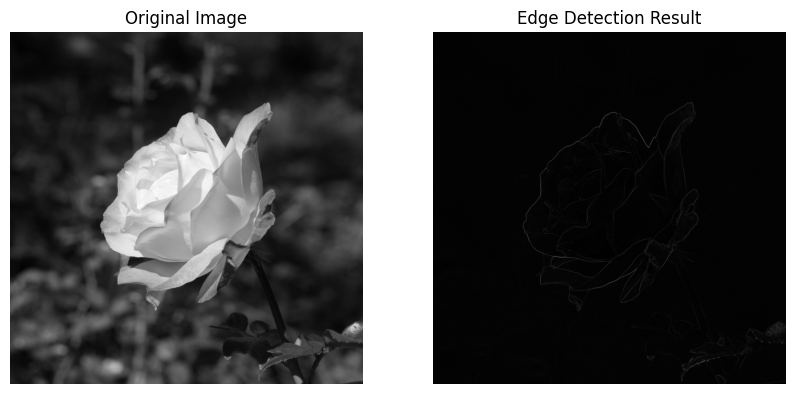

In [ ]:
import imageio
import numpy as np
from matplotlib import pyplot as plt
import skimage
from scipy.ndimage import convolve
import scipy

im = imageio.imread('../lab1-1/love_and_peace.jpg')
im = skimage.color.rgb2gray(im)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(im, cmap='gray')
plt.axis('off')
plt.title('Original Image')


filter_v = np.array([[-1, 1]])
filter_h = np.array([[-1], [1]])
im_v = convolve(im, filter_v)
im_h = convolve(im, filter_h)
plt.subplot(1, 2, 2)
plt.imshow(np.sqrt(im_v**2 + im_h**2), cmap='gray')
plt.axis('off')
plt.title('Edge Detection Result')
plt.show()

2. A Difference of Gaussians (DoG) filter is another edge detection filter (approximation of a Laplacian filter.)

To compute the DoG filter, make two Gaussian filters with the same shape but different sigma (std. dev.) values, and then compute the difference of the two filter matrices.

*Note: This should be a 2D filter, not 1D.*

*Note: Make sure to normalize the Gaussians (divide each Gaussian by its sum) before computing the difference.*

Apply your DoG filter to the flower image and show the result.



/var/folders/q8/mqm68gfx7pjfpqftf7y_v6140000gn/T/ipykernel_31012/1336312373.py:29: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im_flower = imageio.imread('../lab1-1/love_and_peace.jpg')


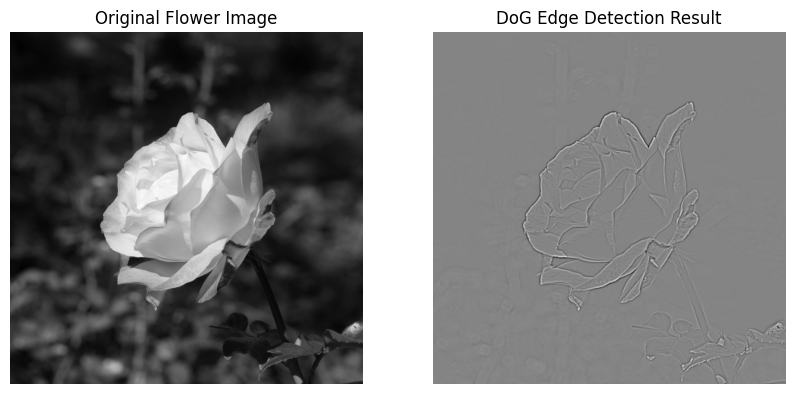

In [ ]:
# Gaussian filter function
def gaussian_filter(size, sigma):
    ax = np.arange(-size // 2 + 1, size // 2 + 1)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    return kernel / np.sum(kernel)

s1 = 3
s2 = 6
size = int(6 * max(s1, s2)) + 1

gaussian1 = gaussian_filter(size, s1)
gaussian2 = gaussian_filter(size, s2)

dog_filter = gaussian1 - gaussian2

im_flower = imageio.imread('../lab1-1/love_and_peace.jpg')
im_flower = skimage.color.rgb2gray(im_flower)
im_dog = convolve(im_flower, dog_filter)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(im_flower, cmap='gray')
plt.axis('off')
plt.title('Original Flower Image')
plt.subplot(1, 2, 2)
plt.imshow(im_dog, cmap='gray')
plt.axis('off')
plt.title('DoG Edge Detection Result')
plt.show()


3. Use NumPy slicing to take every **third** row and **fourth** column of the image, starting at the **second** row and **second** column.

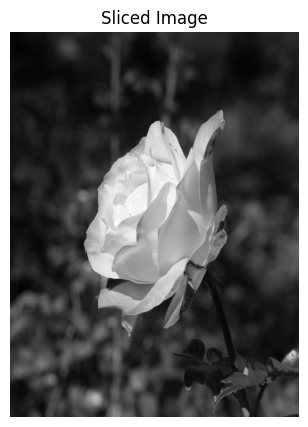

In [ ]:
im_sliced = im[1::3, 1::4]
plt.figure(figsize=(5, 5))
plt.imshow(im_sliced, cmap='gray')
plt.axis('off')
plt.title('Sliced Image')
plt.show()